In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.rename(columns={'Annual Income (k$)':'Annual_income',
                   'Spending Score (1-100)':'Spending_Score'},
                   inplace=True)

In [8]:
df.describe()

,CustomerID,Age,Annual_income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_Score    0
dtype: int64

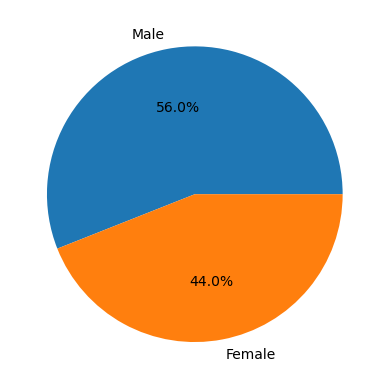

In [11]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
plt.show()

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_income', 'Spending_Score'], dtype='object')

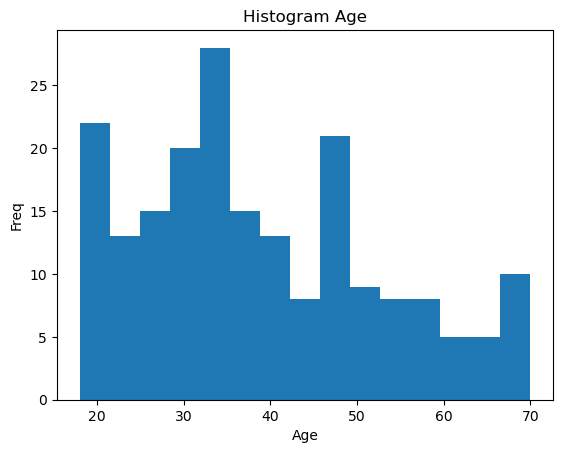

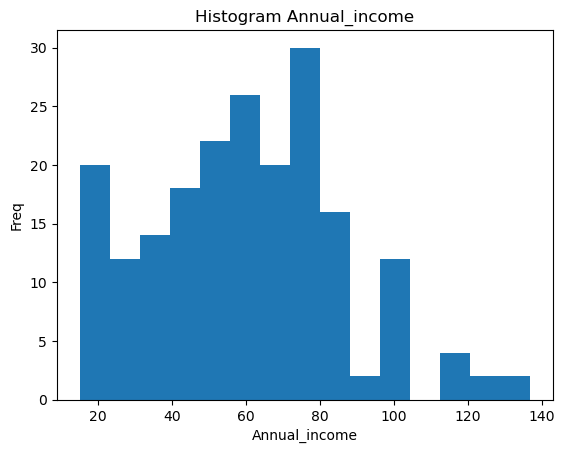

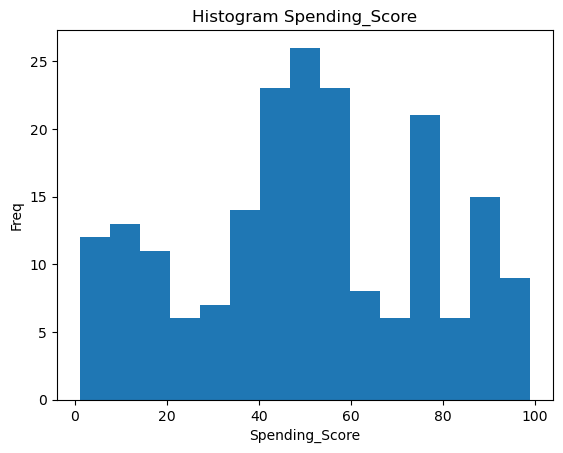

In [13]:
cols = ['Age', 'Annual_income','Spending_Score']

for col in cols:
    plt.hist(df[col],bins=15)
    plt.title('Histogram '+col)
    plt.xlabel(col)
    plt.ylabel('Freq')
    plt.show()

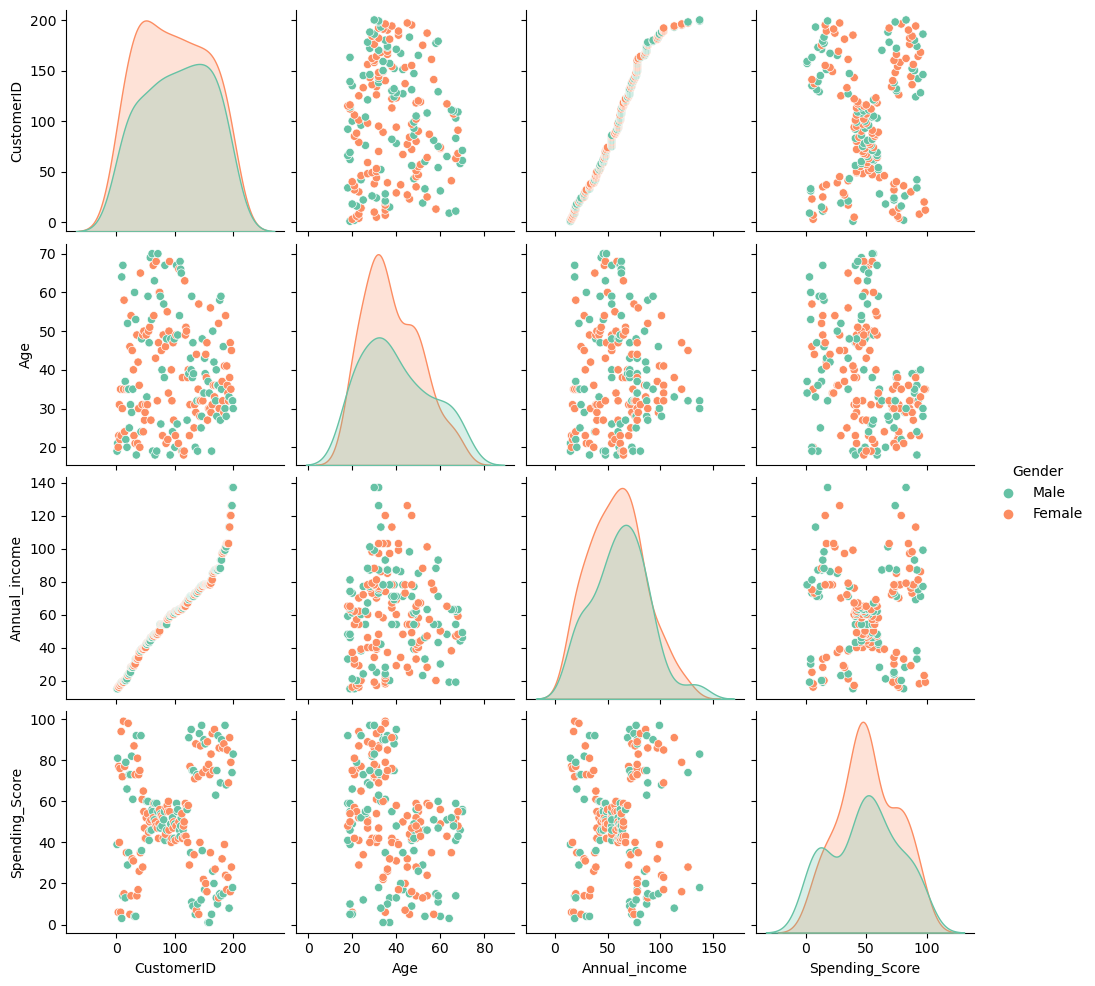

In [14]:
sns.pairplot(df, kind='scatter', hue='Gender', palette='Set2')
plt.show()

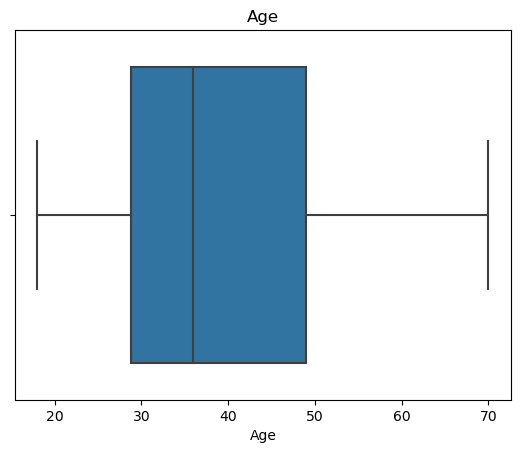

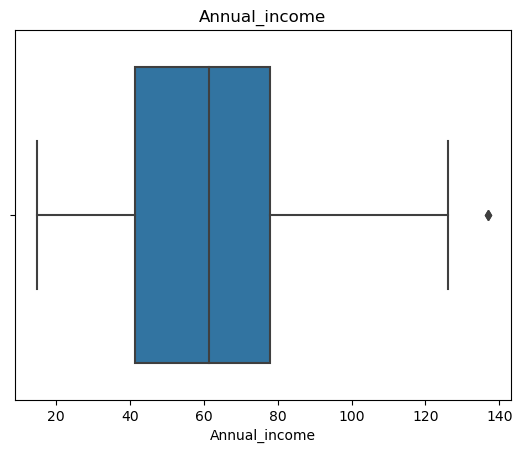

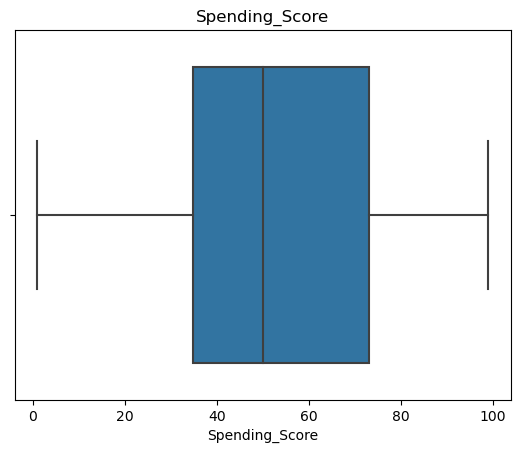

In [15]:
for col in cols:
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.show()

/var/folders/vy/bpb645w940104xm12cdmq4b80000gn/T/ipykernel_33011/115012094.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


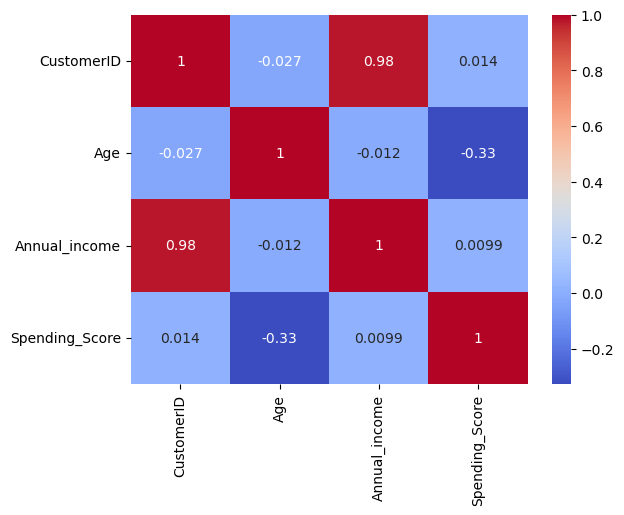

In [16]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
new_df = df.copy()
new_df = new_df.drop('CustomerID', axis=1)
new_df.head()

,Gender,Age,Annual_income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


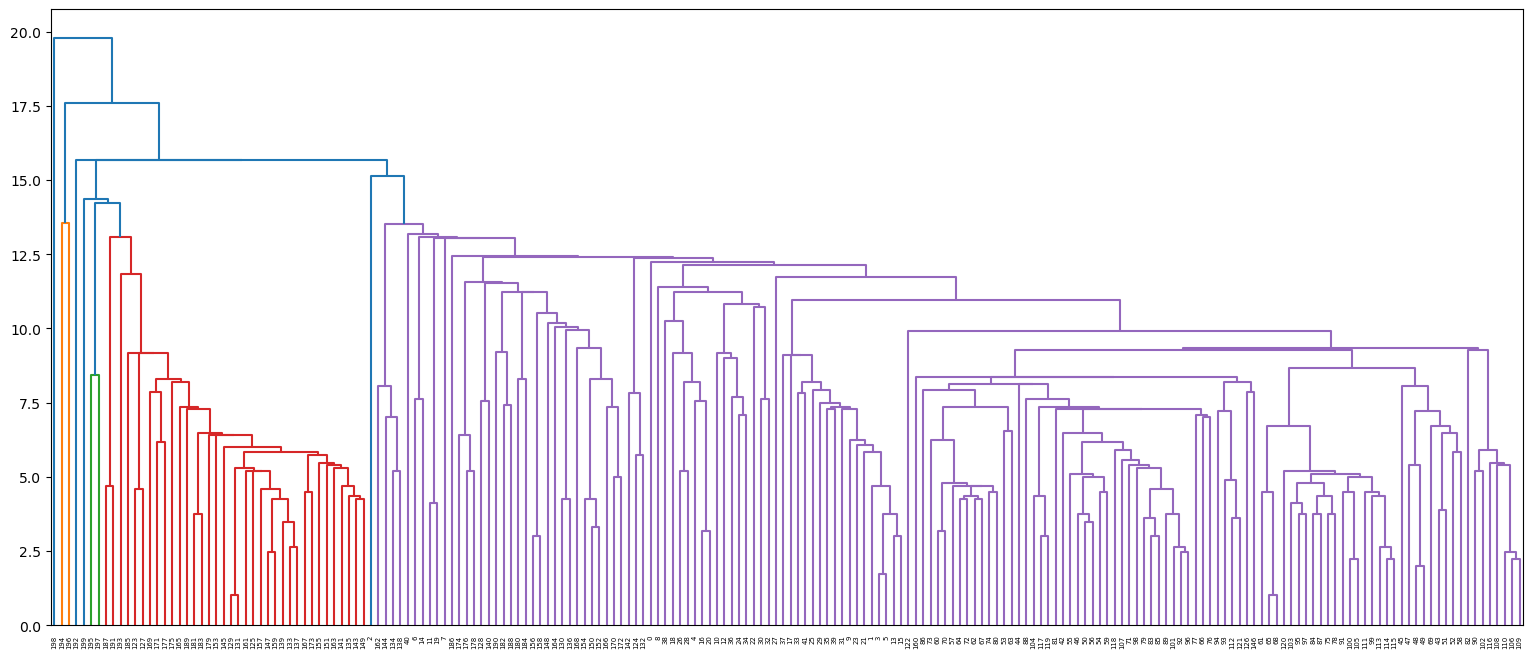

In [19]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(19,8))
mergings = linkage(new_df, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

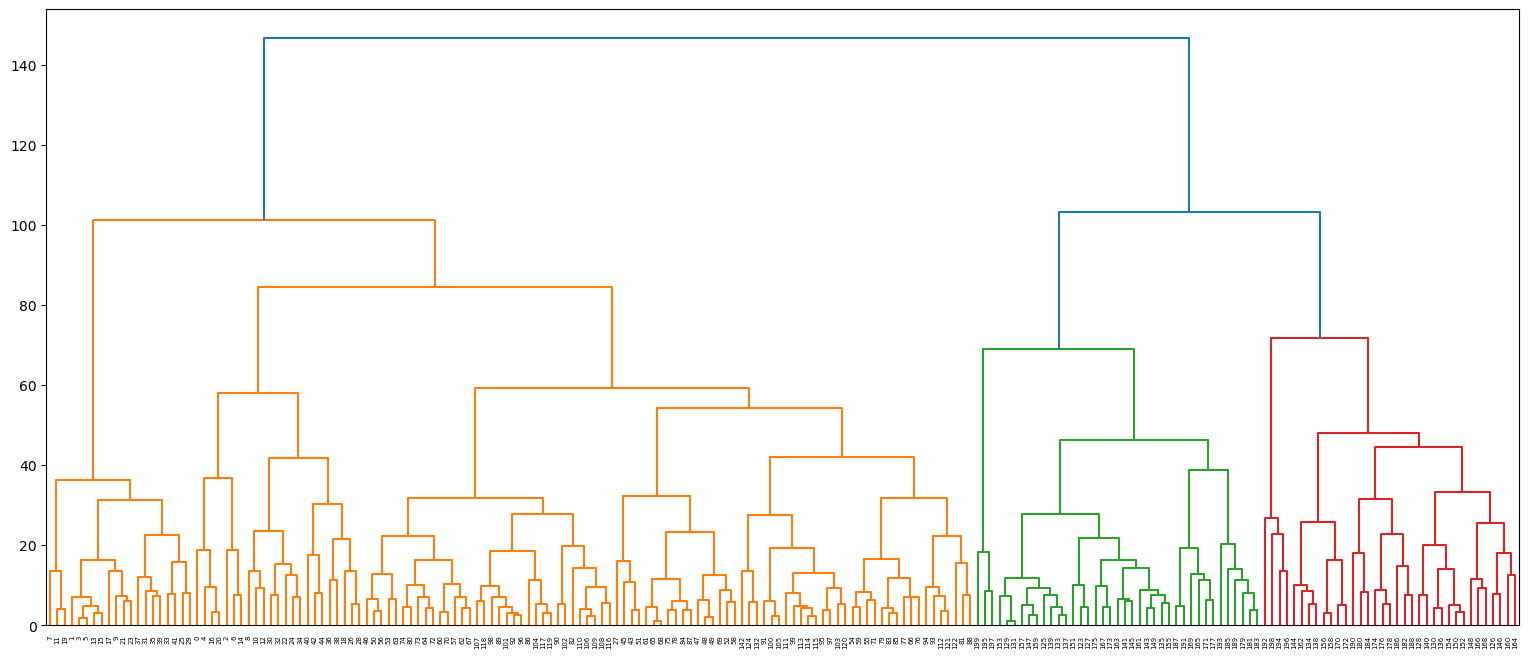

In [20]:
plt.figure(figsize=(19,8))
mergings = linkage(new_df, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

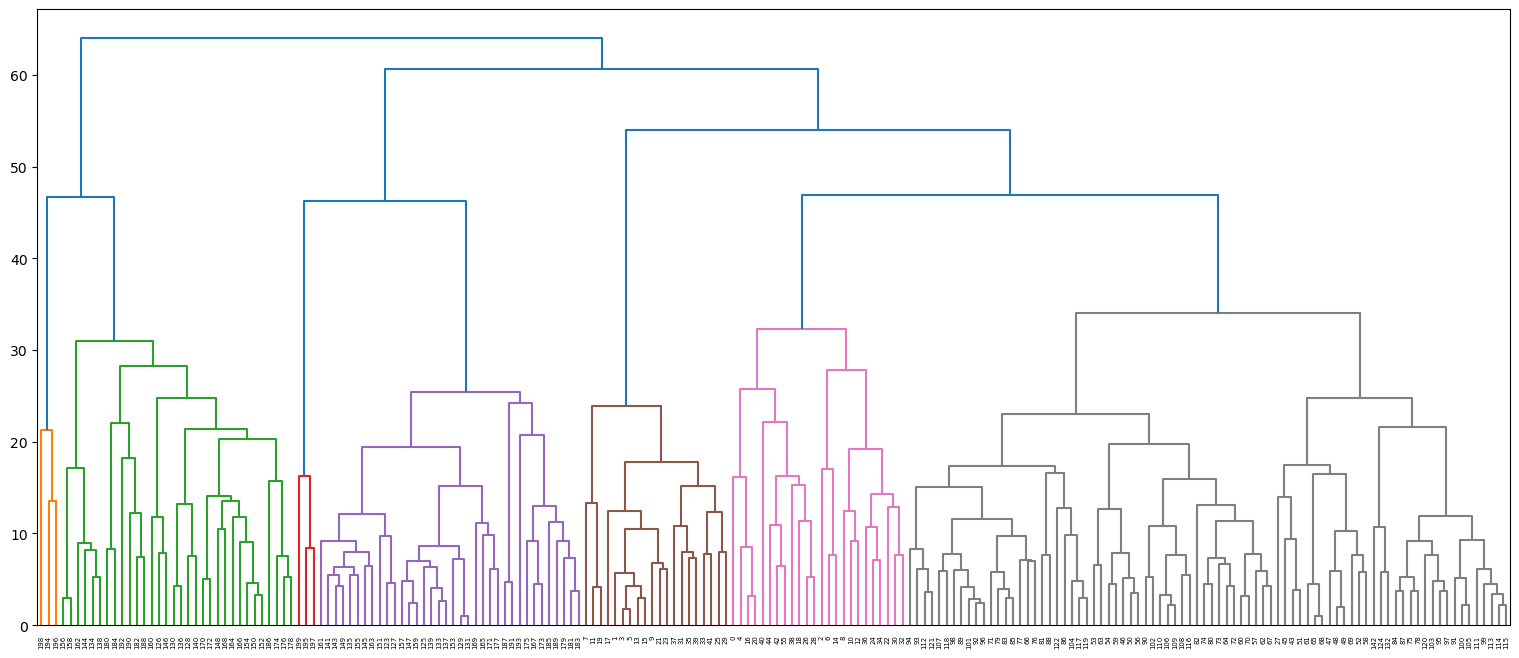

In [21]:
plt.figure(figsize=(19,8))
mergings = linkage(new_df, method='average', metric='euclidean')
dendrogram(mergings)
plt.show()

In [23]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [24]:
new_df['Cluster_Labels'] = cluster_labels
new_df.head()

,Gender,Age,Annual_income,Spending_Score,Cluster_Labels
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


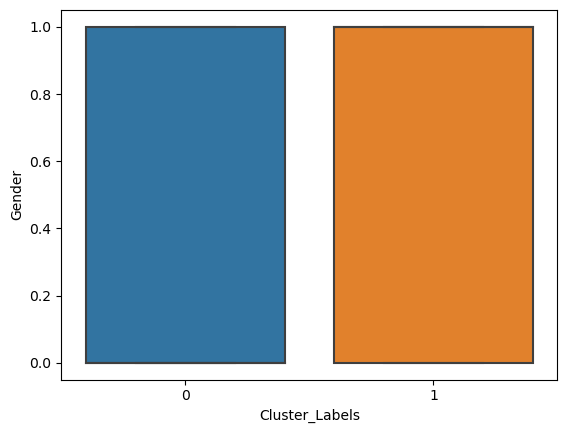

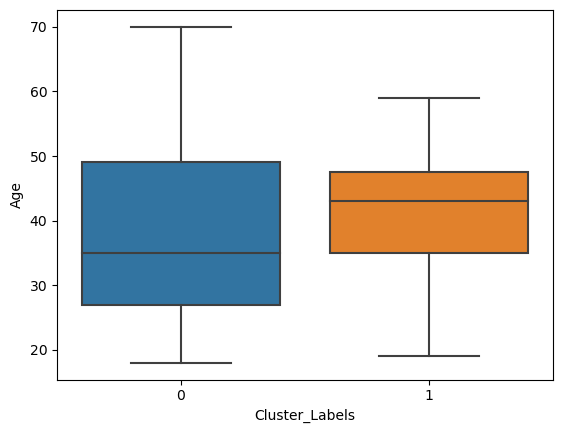

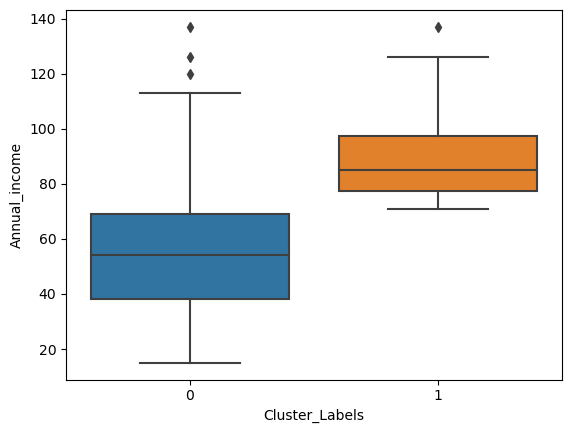

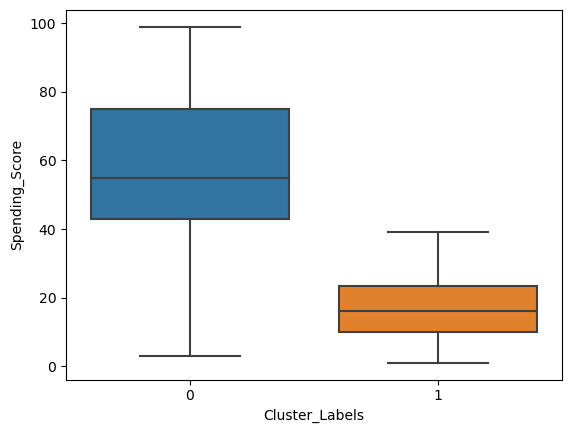

In [25]:
for cols in new_df.columns[:-1].to_list():
    sns.boxplot(y=cols, x='Cluster_Labels',data=new_df)
    plt.show()